In [4]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 指定画布风格
plt.style.use("fivethirtyeight")

# Mac环境下设置中文字体
plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
sns.set_style({'font.sans-serif':['Arial Unicode MS','Arial']})

# Windows环境下设置中文字体
# sns.set_style({'font.sans-serif':['simhei','Arial']})

# 如果代码不在jupyter中执行，可以删掉
%matplotlib inline

In [5]:
house_df = pd.read_excel('house.xlsx')
# 看一下数据长什么样子
house_df.head()

,houseId,houseTitle,houseTotalMoney,houseSinglePrice,houseDownPayment,houseGardenName,houseLocation,houseNumber,houseType,houseFloor,...,houseLastTrade,houseUsage,houseAgeLimit,housePrivilegeProperty,housePledge,houseRecord,houseImg,houseUrl,houseRefererUrl,houseCrawlTime
0,1,春禧商务酒店 中楼层 采光好,118万,23629元/平米,36万,春禧商务酒店,锦江\t盐市口\t一环内,106102444217,1室0厅1厨1卫,中楼层(共14层),...,2015-03-28,普通住宅,满两年,非共有,无抵押,已上传房本照片,NaN,https://cd.lianjia.com/ershoufang/106102444217...,https://cd.lianjia.com/ershoufang/pg7/,2019-07-17 10:56:40
1,2,时代水岸康城 有装修 有家具家电 可拎包入住,88万,11734元/平米,27万,时代水岸康城,郫都\t红光,106101454157,3室2厅1厨1卫,低楼层(共25层),...,暂无数据,普通住宅,暂无数据,非共有,有抵押10万元暂不清楚业主自还,未上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106101454157...,https://cd.lianjia.com/ershoufang/pg7/,2019-07-17 10:56:40
2,3,精装套二，高楼层，采光好，视野无遮挡。,128万,15473元/平米,39万,金辉枫尚,武侯\t武侯立交\t二至三环,106102939993,2室1厅1厨1卫,高楼层(共18层),...,2014-09-03,普通住宅,满两年,共有,有抵押1万元,已上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106102939993...,https://cd.lianjia.com/ershoufang/pg7/,2019-07-17 10:56:40
3,4,纯中庭精装N户型，，朝东采光好,303万,34277元/平米,91万,中海兰庭,高新\t大源\t绕城高速至第二绕城高速,106102254366,4室1厅1厨2卫,低楼层(共32层),...,2015-05-06,普通住宅,满两年,共有,有抵押50万元,已上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106102254366...,https://cd.lianjia.com/ershoufang/pg22/,2019-07-17 10:56:40
4,5,上置小套三 看房便利 随时咨询,86万,11945元/平米,26万,上置雅宾利,郫都\t红光\t绕城高速至第二绕城高速,106101689983,3室1厅1厨1卫,中楼层(共23层),...,暂无数据,普通住宅,暂无数据,共有,有抵押26万元农行高新支行客户偿还,未上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106101689983...,https://cd.lianjia.com/ershoufang/pg35/,2019-07-17 10:56:40


In [6]:
# 查看缺失值情况
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 32 columns):
houseId                   2993 non-null int64
houseTitle                2993 non-null object
houseTotalMoney           2993 non-null object
houseSinglePrice          2993 non-null object
houseDownPayment          2993 non-null object
houseGardenName           2993 non-null object
houseLocation             2993 non-null object
houseNumber               2993 non-null int64
houseType                 2993 non-null object
houseFloor                2993 non-null object
houseBuildingArea         2993 non-null object
houseStructure            2993 non-null object
houseInnerArea            2993 non-null object
houseBuildingType         2993 non-null object
houseOrientation          2993 non-null object
houseBuildingStructure    2993 non-null object
houseDecoration           2993 non-null object
houseElevatorRatio        2985 non-null object
houseElevator             2985 non-null object
ho

In [7]:
house_df.dropna(inplace=True)
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 1 to 2992
Data columns (total 32 columns):
houseId                   2886 non-null int64
houseTitle                2886 non-null object
houseTotalMoney           2886 non-null object
houseSinglePrice          2886 non-null object
houseDownPayment          2886 non-null object
houseGardenName           2886 non-null object
houseLocation             2886 non-null object
houseNumber               2886 non-null int64
houseType                 2886 non-null object
houseFloor                2886 non-null object
houseBuildingArea         2886 non-null object
houseStructure            2886 non-null object
houseInnerArea            2886 non-null object
houseBuildingType         2886 non-null object
houseOrientation          2886 non-null object
houseBuildingStructure    2886 non-null object
houseDecoration           2886 non-null object
houseElevatorRatio        2886 non-null object
houseElevator             2886 non-null object
ho

In [8]:
# 做一部分预处理
house_df['houseTotalMoney'] = house_df['houseTotalMoney'].apply(lambda x: float(x.replace('万', '')))
house_df['houseSinglePrice'] = house_df['houseSinglePrice'].apply(lambda x: float(x.replace('元/平米', '')))
# house_df['houseDownPayment'] = house_df['houseDownPayment'].apply(lambda x: float(x.replace('万', '')))
house_df['houseBuildingArea'] = house_df['houseBuildingArea'].apply(lambda x: float(x.replace('㎡', '')))
house_df['totalFloor'] = house_df['houseFloor'].apply(lambda x:re.search('\d+', x).group())

In [9]:
# houseLocation字段表示区域，我们取前两个字，然后方便分区统计
house_df['Region'] = house_df['houseLocation'].apply(lambda x:x.split('\t')[0])

In [10]:
house_df.head()

,houseId,houseTitle,houseTotalMoney,houseSinglePrice,houseDownPayment,houseGardenName,houseLocation,houseNumber,houseType,houseFloor,...,houseAgeLimit,housePrivilegeProperty,housePledge,houseRecord,houseImg,houseUrl,houseRefererUrl,houseCrawlTime,totalFloor,Region
1,2,时代水岸康城 有装修 有家具家电 可拎包入住,88.0,11734.0,27万,时代水岸康城,郫都\t红光,106101454157,3室2厅1厨1卫,低楼层(共25层),...,暂无数据,非共有,有抵押10万元暂不清楚业主自还,未上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106101454157...,https://cd.lianjia.com/ershoufang/pg7/,2019-07-17 10:56:40,25,郫都
2,3,精装套二，高楼层，采光好，视野无遮挡。,128.0,15473.0,39万,金辉枫尚,武侯\t武侯立交\t二至三环,106102939993,2室1厅1厨1卫,高楼层(共18层),...,满两年,共有,有抵押1万元,已上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106102939993...,https://cd.lianjia.com/ershoufang/pg7/,2019-07-17 10:56:40,18,武侯
3,4,纯中庭精装N户型，，朝东采光好,303.0,34277.0,91万,中海兰庭,高新\t大源\t绕城高速至第二绕城高速,106102254366,4室1厅1厨2卫,低楼层(共32层),...,满两年,共有,有抵押50万元,已上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106102254366...,https://cd.lianjia.com/ershoufang/pg22/,2019-07-17 10:56:40,32,高新
4,5,上置小套三 看房便利 随时咨询,86.0,11945.0,26万,上置雅宾利,郫都\t红光\t绕城高速至第二绕城高速,106101689983,3室1厅1厨1卫,中楼层(共23层),...,暂无数据,共有,有抵押26万元农行高新支行客户偿还,未上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106101689983...,https://cd.lianjia.com/ershoufang/pg35/,2019-07-17 10:56:40,23,郫都
5,6,青羊区信托单位房标准三居室小区可停车,225.0,16065.0,68万,文庙公寓,青羊\t人民公园\t一环内,106102933675,3室2厅1厨2卫,低楼层(共7层),...,暂无数据,非共有,无抵押,未上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106102933675...,https://cd.lianjia.com/ershoufang/pg35/,2019-07-17 10:56:40,7,青羊


In [11]:
# 再次观察有异常值
house_df.describe() # houseNumber为房屋编号  不用管

,houseId,houseTotalMoney,houseSinglePrice,houseNumber,houseBuildingArea
count,2886.000000,2886.000000,2886.000000,2.886000e+03,2886.000000
mean,1490.764380,143.652772,15685.462924,1.061025e+11,90.377585
std,865.249813,80.367330,5184.566435,4.928009e+05,29.242237
min,2.000000,32.000000,5129.000000,1.061000e+11,28.510000
25%,739.250000,95.000000,11970.500000,1.061023e+11,73.292500
50%,1490.500000,125.000000,14745.500000,1.061026e+11,86.150000
75%,2235.750000,167.750000,18324.750000,1.061028e+11,103.165000
max,2993.000000,1100.000000,44846.000000,1.061030e+11,380.000000


---
# 可视化分析

In [12]:
# 按区域分析数量
df_house_count = house_df.groupby('Region')['houseId'].count().sort_values(ascending=False).to_frame().reset_index()
df_house_count.columns = ['Region', 'Count']
df_house_count

,Region,Count
0,成华,323
1,高新,318
2,青羊,293
3,武侯,276
4,温江,245
5,郫都,233
6,双流,217
7,锦江,217
8,金牛,208
9,天府新区,176


In [13]:
# 按区域分析数量和价格
df_house_mean = house_df.groupby('Region')['houseSinglePrice'].mean().sort_values(ascending=False).to_frame().reset_index()
df_house_mean

,Region,houseSinglePrice
0,高新,20794.103774
1,锦江,20255.594470
2,青羊,18808.614334
3,成华,17008.643963
4,武侯,16596.576087
5,天府新区,15472.585227
6,金牛,14404.081731
7,龙泉驿,13811.895954
8,高新西,13224.500000
9,双流,12911.649770


Text(0.5,1,'成都各区二手房每平米单价对比')

Text(0.5,0,'区域')

Text(0,0.5,'每平米单价')

Text(0.5,1,'成都各区二手房数量对比')

Text(0.5,0,'区域')

Text(0,0.5,'数量')

Text(0.5,1,'成都各区二手房房屋总价')

Text(0.5,0,'区域')

Text(0,0.5,'房屋总价')

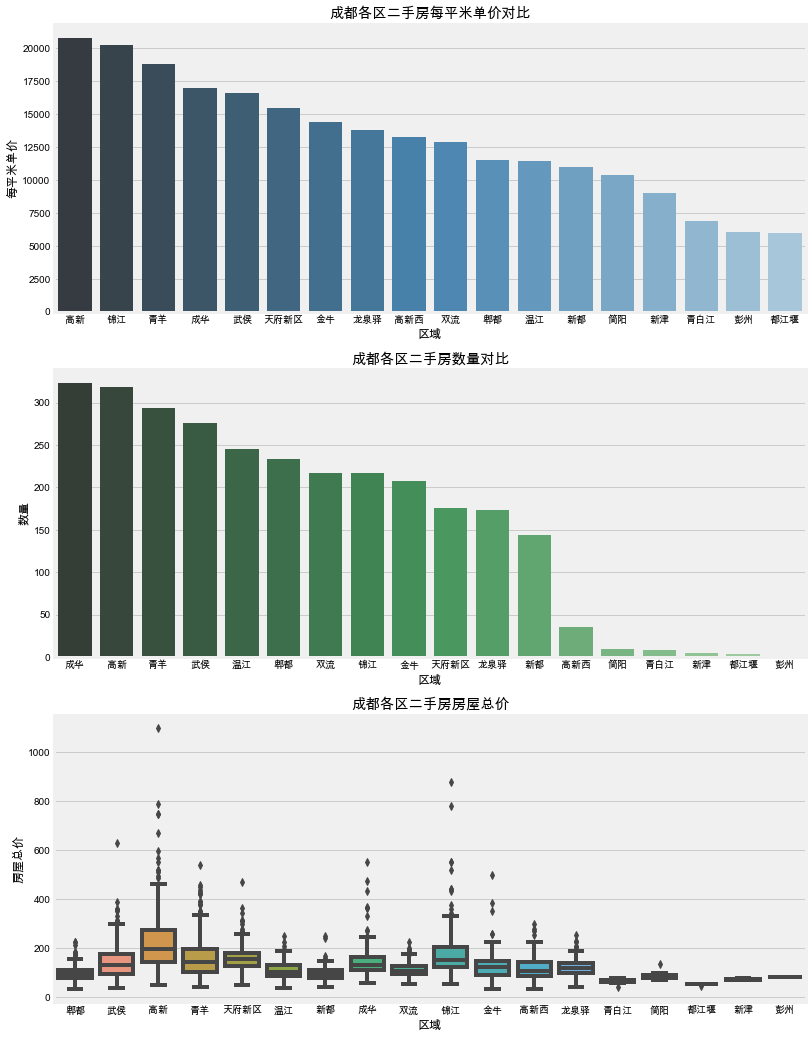

In [14]:
f, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize=(12, 18))
sns.barplot(x='Region', y='houseSinglePrice', palette='Blues_d', data=df_house_mean, ax=ax1)
ax1.set_title('成都各区二手房每平米单价对比')
ax1.set_xlabel('区域')
ax1.set_ylabel('每平米单价')

sns.barplot(x='Region', y='Count', palette='Greens_d', data=df_house_count, ax=ax2)
ax2.set_title('成都各区二手房数量对比')
ax2.set_xlabel('区域')
ax2.set_ylabel('数量')

sns.boxplot(x='Region', y='houseTotalMoney', data=house_df, ax=ax3)
ax3.set_title('成都各区二手房房屋总价')
ax3.set_xlabel('区域')
ax3.set_ylabel('房屋总价')

plt.savefig('images/img1')
plt.show()

<BarContainer object of 18 artists>

Text(0.5,1,'成都各区二手房每平米单价对比')

Text(0.5,0,'区域')

Text(0,0.5,'每平米单价')

<BarContainer object of 18 artists>

Text(0.5,1,'成都各区二手房数量对比')

Text(0.5,0,'区域')

Text(0,0.5,'数量')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a25bce518>,
 'caps': [<matplotlib.lines.Line2D at 0x1a25bd3940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a25bce390>,
 'medians': [<matplotlib.lines.Line2D at 0x1a25bd3eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a25bd96a0>,
 'means': []}

Text(0.5,1,'成都各区二手房房屋总价')

Text(0.5,0,'区域')

Text(0,0.5,'房屋总价')

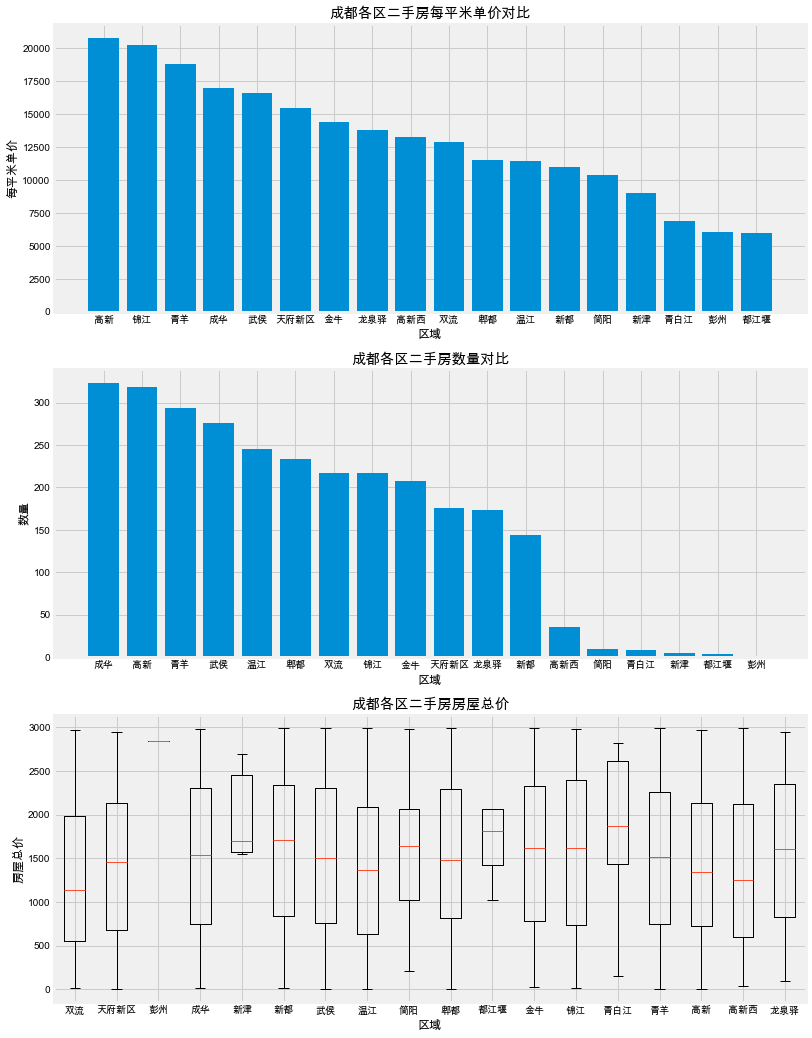

In [36]:
# Matplotlib实现
f, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize=(12, 18))
ax1.bar('Region', 'houseSinglePrice', data=df_house_mean)
ax1.set_title('成都各区二手房每平米单价对比')
ax1.set_xlabel('区域')
ax1.set_ylabel('每平米单价')

ax2.bar('Region', 'Count', data=df_house_count)
ax2.set_title('成都各区二手房数量对比')
ax2.set_xlabel('区域')
ax2.set_ylabel('数量')


box_data = house_df.groupby('Region')['houseTotalMoney'].groups
ax3.boxplot(box_data.values(), labels=box_data.keys())
ax3.set_title('成都各区二手房房屋总价')
ax3.set_xlabel('区域')
ax3.set_ylabel('房屋总价')

plt.savefig('images/img1')
plt.show()

---
# 房屋面积分析

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'面积')

Text(0.5,0,'面积')

Text(0,0.5,'总价')

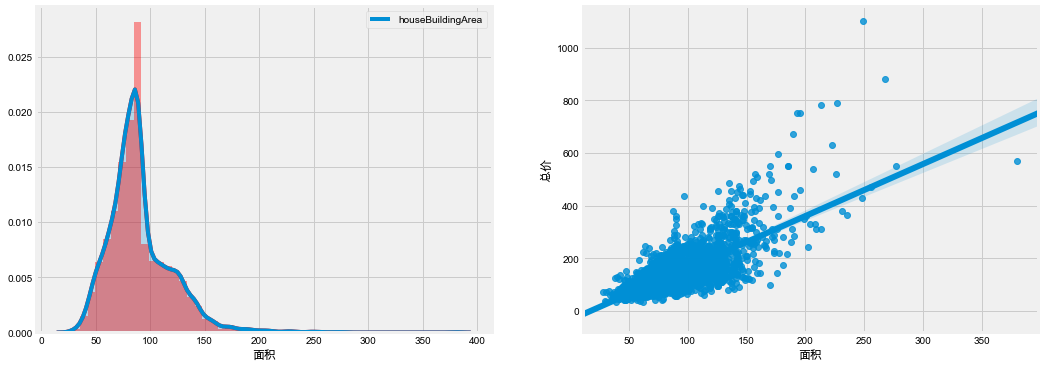

In [43]:
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(16, 6))
# 房屋面积
sns.distplot(house_df['houseBuildingArea'], ax=ax1, color='r')
sns.kdeplot(house_df['houseBuildingArea'], shade=True, ax=ax1)
ax1.set_xlabel('面积')

# 房屋面积和价格的关系
sns.regplot(x='houseBuildingArea', y='houseTotalMoney', data=house_df, ax=ax2)
ax2.set_xlabel('面积')
ax2.set_ylabel('总价')

plt.savefig('images/img2')
plt.show()

(array([  7.,  31.,  75., 130., 172., 223., 314., 391., 571., 162., 132.,
        129., 122., 113.,  94.,  66.,  49.,  25.,  22.,   7.,  13.,   6.,
          7.,   5.,   4.,   3.,   2.,   1.,   3.,   1.,   0.,   2.,   1.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 28.51  ,  35.5398,  42.5696,  49.5994,  56.6292,  63.659 ,
         70.6888,  77.7186,  84.7484,  91.7782,  98.808 , 105.8378,
        112.8676, 119.8974, 126.9272, 133.957 , 140.9868, 148.0166,
        155.0464, 162.0762, 169.106 , 176.1358, 183.1656, 190.1954,
        197.2252, 204.255 , 211.2848, 218.3146, 225.3444, 232.3742,
        239.404 , 246.4338, 253.4636, 260.4934, 267.5232, 274.553 ,
        281.5828, 288.6126, 295.6424, 302.6722, 309.702 , 316.7318,
        323.7616, 330.7914, 337.8212, 344.851 , 351.8808, 358.9106,
        365.9404, 372.9702, 380.    ]),
 <a list of 50 Patch objects>)

Text(0.5,0,'面积')

Text(0.5,0,'面积')

Text(0,0.5,'总价')

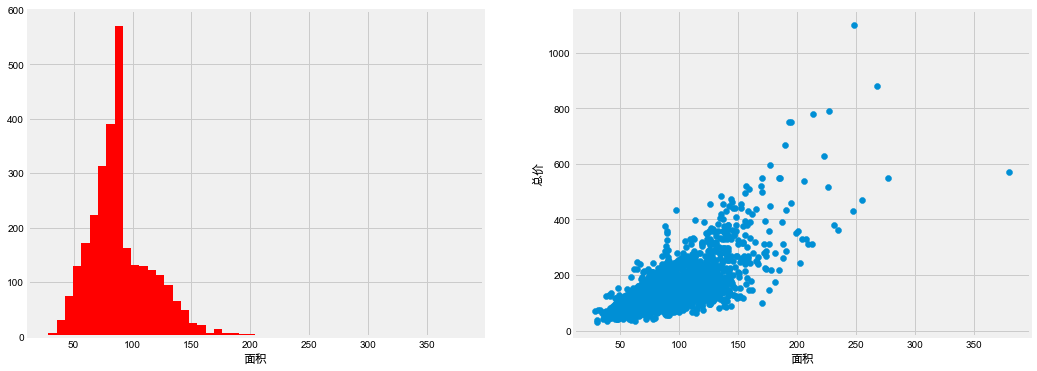

In [49]:
# matplotlib
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(16, 6))
# 房屋面积
ax1.hist(house_df['houseBuildingArea'], bins=50, color='r')
ax1.set_xlabel('面积')

# 房屋面积和价格的关系
ax2.scatter(x='houseBuildingArea', y='houseTotalMoney', data=house_df)
ax2.set_xlabel('面积')
ax2.set_ylabel('总价')

plt.savefig('images/img2')
plt.show()

---
# 户型分析

Text(0.5,1,'房屋户型')

Text(0.5,0,'数量')

Text(0,0.5,'户型')

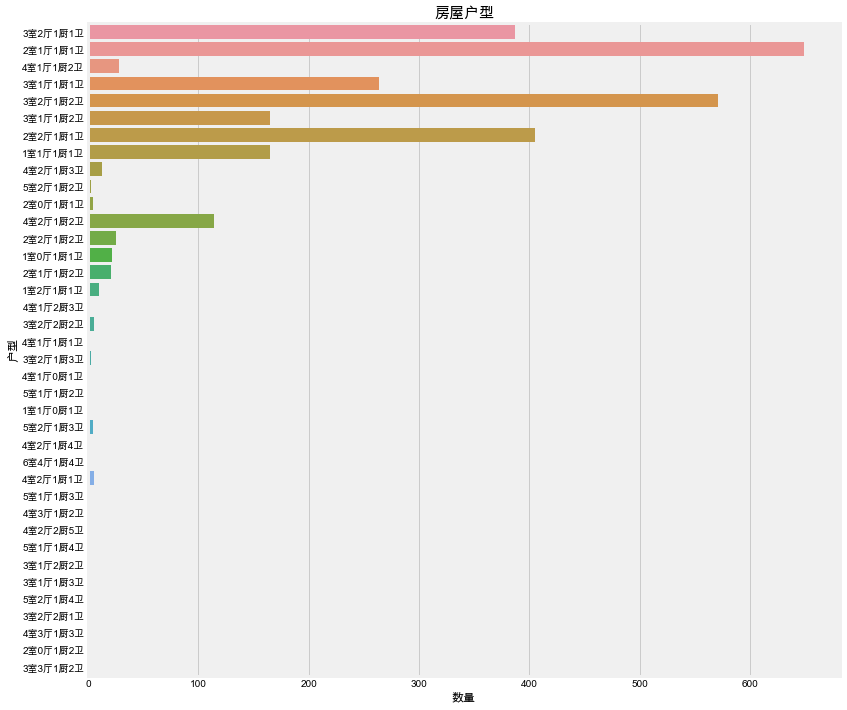

In [50]:
f, ax1 = plt.subplots(figsize=(12,12))
sns.countplot(y='houseType', data=house_df, ax=ax1)
ax1.set_title('房屋户型', fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')

plt.savefig('images/img3')
plt.show()

<BarContainer object of 38 artists>

Text(0.5,1,'房屋户型')

Text(0.5,0,'数量')

Text(0,0.5,'户型')

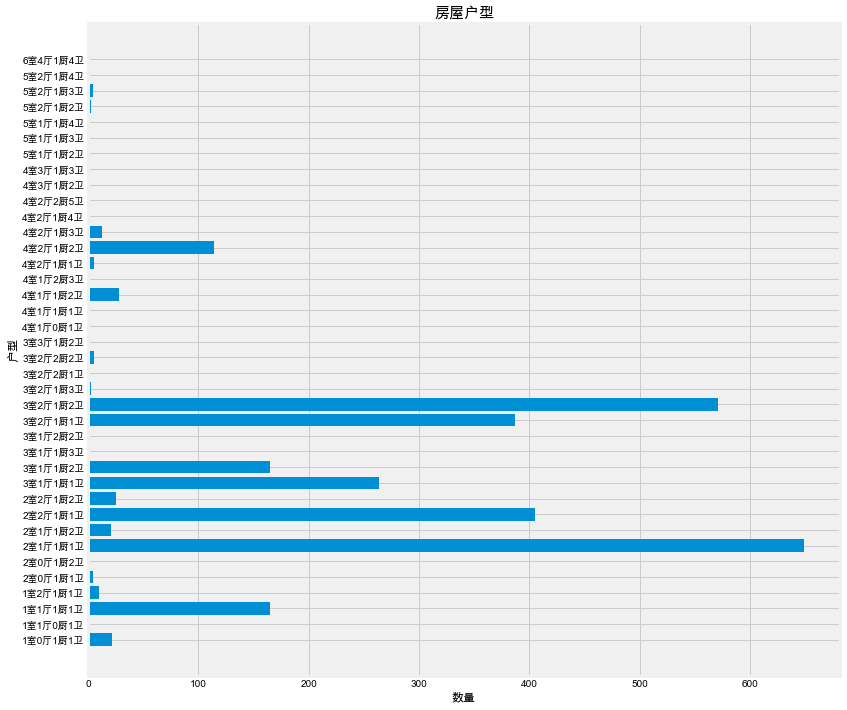

In [72]:
# matplotlib
f, ax1 = plt.subplots(figsize=(12,12))

countplot = house_df.groupby('houseType')['houseId'].groups
width = [len(i) for i in countplot.values()]

ax1.barh(list(countplot.keys()), width)
ax1.set_title('房屋户型', fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')

plt.savefig('images/img3')
plt.show()

---
# 装修情况分析

In [73]:
house_df['houseDecoration'].value_counts()

精装    1419
简装    1014
毛坯     444
其他       9
Name: houseDecoration, dtype: int64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


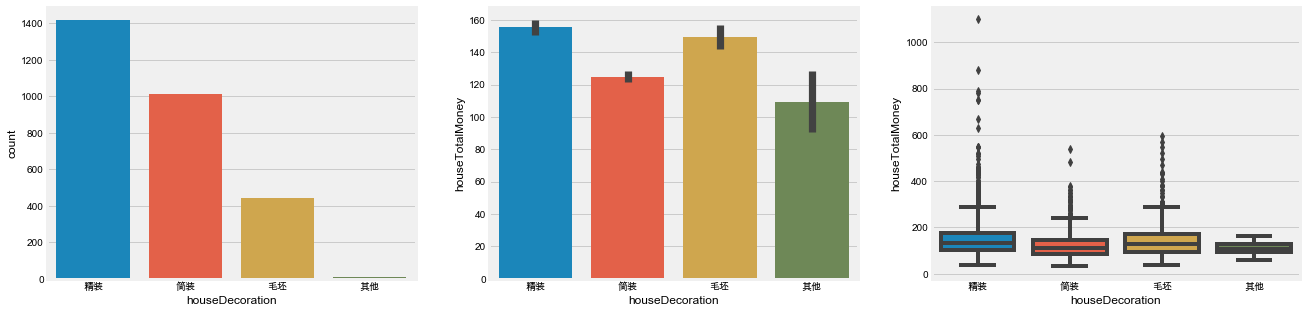

In [74]:
f, [ax1,ax2,ax3] = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot(house_df['houseDecoration'], ax=ax1)
sns.barplot(x='houseDecoration', y='houseTotalMoney', data=house_df, ax=ax2)
sns.boxplot(x='houseDecoration', y='houseTotalMoney', data=house_df, ax=ax3)

plt.savefig('images/img4')
plt.show()

---
# 电梯分析

In [85]:
house_df['houseElevator'].value_counts()

有       2282
无        425
暂无数据     179
Name: houseElevator, dtype: int64

In [86]:
elevator_df = house_df[house_df['houseElevator'] != '暂无数据']
elevator_df['houseElevator'].value_counts()

有    2282
无     425
Name: houseElevator, dtype: int64

Text(0.5,1,'有无电梯数量对比')

Text(0.5,0,'是否有电梯')

Text(0,0.5,'数量')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'有无电梯房价对比')

Text(0.5,0,'是否有电梯')

Text(0,0.5,'单价')

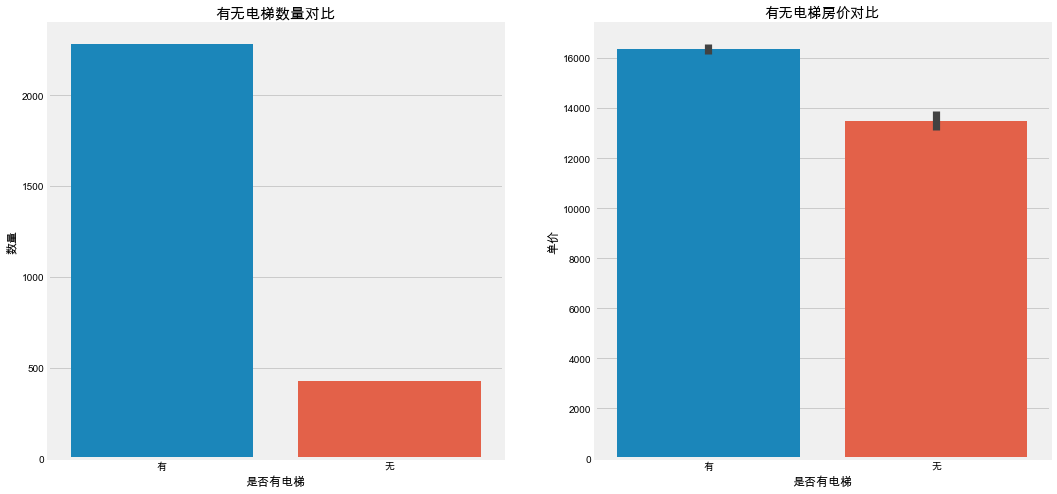

In [87]:
f, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 8))
sns.countplot(elevator_df['houseElevator'], ax=ax1)
ax1.set_title('有无电梯数量对比', fontsize=15)
ax1.set_xlabel('是否有电梯')
ax1.set_ylabel('数量')

sns.barplot(x='houseElevator', y='houseSinglePrice', data=elevator_df, ax=ax2)
ax2.set_title('有无电梯房价对比')
ax2.set_xlabel('是否有电梯')
ax2.set_ylabel('单价')

plt.savefig('images/img5')
plt.show()

---
# 楼层分析

Text(0.5,1,'房屋楼层')

Text(0.5,0,'总楼层')

Text(0,0.5,'数量')

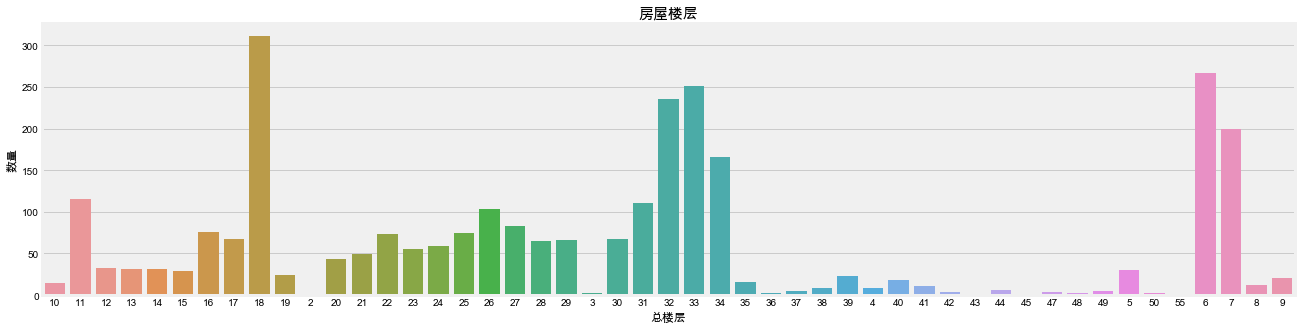

In [83]:
f, ax1 = plt.subplots(figsize=(20,5))
sns.countplot(x='totalFloor', data=house_df, ax=ax1)
ax1.set_title('房屋楼层',fontsize=15)
ax1.set_xlabel('总楼层')
ax1.set_ylabel('数量')

plt.savefig('images/img6')
plt.show()

<BarContainer object of 49 artists>

Text(0.5,1,'房屋楼层')

Text(0.5,0,'总楼层')

Text(0,0.5,'数量')

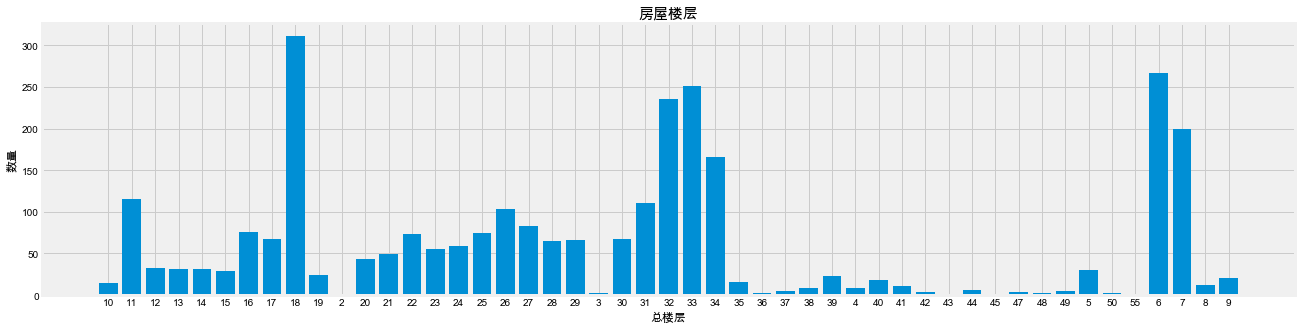

In [90]:
f, ax1 = plt.subplots(figsize=(20,5))

countplot = house_df.groupby('totalFloor')['houseId'].groups
height = [len(i) for i in countplot.values()]

ax1.bar(countplot.keys(), height)
ax1.set_title('房屋楼层',fontsize=15)
ax1.set_xlabel('总楼层')
ax1.set_ylabel('数量')

plt.savefig('images/img6')
plt.show()